In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_excel("NFHS_5_India_Districts_Factsheet_Data.xls")

In [3]:
df = df[["District Names","State/UT","Women (age 15-49)  with 10 or more years of schooling (%)","Women age 15-24 years who use hygienic methods of protection during their menstrual period5 (%)",
        "Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)",
        "Children under 5 years who are underweight (weight-for-age)18 (%)",
        "Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)",
        "Households using clean fuel for cooking3 (%)"]]

In [4]:
df.columns

Index(['District Names', 'State/UT',
       'Women (age 15-49)  with 10 or more years of schooling (%)',
       'Women age 15-24 years who use hygienic methods of protection during their menstrual period5 (%)',
       'Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)',
       'Children under 5 years who are underweight (weight-for-age)18 (%)',
       'Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)',
       'Households using clean fuel for cooking3 (%)'],
      dtype='object')

In [5]:
df = df.rename(columns={
    'Women (age 15-49)  with 10 or more years of schooling (%)': 'Edu10',
    'Women age 15-24 years who use hygienic methods of protection during their menstrual period5 (%)': 'Hygiene',
    'Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)': 'UnderBMI',
    'Children under 5 years who are underweight (weight-for-age)18 (%)': 'Underweight',
    'Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)': 'OverBMI',
    'Households using clean fuel for cooking3 (%)': 'CleanFuel'
})


In [6]:
df.columns

Index(['District Names', 'State/UT', 'Edu10', 'Hygiene', 'UnderBMI',
       'Underweight', 'OverBMI', 'CleanFuel'],
      dtype='object')

In [7]:
df['State/UT'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli & Daman and Diu', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', ' Lakshadweep ', 'Madhya Pradesh',
       'Maharastra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT of Delhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [8]:
df["District Names"].unique()

array(['Nicobars', 'North & Middle Andaman ', 'South Andaman ',
       'Srikakulam ', 'Vizianagaram ', 'Visakhapatnam ', 'East Godavari ',
       'West Godavari ', 'Krishna ', 'Guntur ', 'Prakasam ',
       'Sri Potti Sriramulu Nello ', 'Y.S.R. ', 'Kurnool ', 'Anantapur ',
       'Chittoor ', 'Tawang ', 'West Kameng ', 'East Kameng ',
       'Papum Pare ', 'Upper Subansiri ', 'Upper Siang ', 'Changlang ',
       'Lower Subansiri ', 'Dibang Valley ', 'Lower Dibang Valley ',
       'Anjaw ', 'East Siang ', 'Kra Daadi ', 'Kurung Kumey ', 'Lohit ',
       'Longding ', 'Namsai ', 'Siang ', 'Tirap ', 'West Siang ',
       'Kokrajhar ', 'Goalpara ', 'Barpeta ', 'Morigaon ', 'Lakhimpur ',
       'Dhemaji ', 'Tinsukia ', 'Dibrugarh ', 'Golaghat ', 'Dima Hasao ',
       'Cachar ', 'Karimganj ', 'Hailakandi ', 'Bongaigaon ', 'Chirang ',
       'Kamrup ', 'Kamrup Metropolitan ', 'Nalbari ', 'Baksa ',
       'Darrang ', 'Udalguri ', 'Biswanath ', 'Charaideo ', 'Dhubri ',
       'Hojai ', 'Jorhat ',

In [9]:
gdf = gpd.read_file("map/output.shp")

# gdf = gpd.read_file("INDIA_DISTRICTS.geojson")

In [10]:
gdf.statename.unique()

array(['Uttarakhand', 'Himachal Pradesh', 'Madhya Pradesh',
       'Jammu & Kashmir', 'Gujarat', 'Andhra Pradesh', 'West Bengal',
       'Uttar Pradesh', 'Daman & Diu', 'Kerala', 'Lakshadweep', 'Sikkim',
       'Bihar', 'Dadra & Nagar Haveli', 'Jharkhand', 'NCT of Delhi',
       'Haryana', 'Punjab', 'Karnataka', 'Maharashtra', 'Chandigarh',
       'Pondicherry', 'Manipur', 'Mizoram', 'Tamil Nadu', 'Nagaland',
       'Arunachal Pradesh', 'Assam', 'Tripura', 'Meghalaya', 'Telangana',
       'Goa', 'Andaman & Nicobar Islands', 'Orissa', 'Rajasthan',
       'Chhatisgarh', 'Ladakh'], dtype=object)

In [11]:
state_name_map = {
    'Maharastra': 'Maharashtra',
    'Odisha': 'Orissa',
    'Puducherry': 'Pondicherry',
    'Chhattisgarh': 'Chhatisgarh',
    ' Lakshadweep ': 'Lakshadweep',
    'Dadra and Nagar Haveli & Daman and Diu': 'Dadra & Nagar Haveli',  # or 'Daman & Diu', depending on match
}


In [12]:
# Standardize and clean state names in df
df['State/UT'] = df['State/UT'].str.strip()
df['State/UT'] = df['State/UT'].replace(state_name_map)

# Also clean gdf statenames for consistency
gdf['statename'] = gdf['statename'].str.strip()


In [13]:
df_states = set(df['State/UT'].unique())
gdf_states = set(gdf['statename'].unique())

unmatched_states = df_states - gdf_states

print("Unmatched state names after mapping:", unmatched_states)


Unmatched state names after mapping: set()


In [14]:
import pandas as pd

# Strip and standardize case for better matching
df['District Names'] = df['District Names'].str.strip().str.lower()
df['State/UT'] = df['State/UT'].str.strip().str.lower()

gdf['distname'] = gdf['distname'].str.strip().str.lower()
gdf['statename'] = gdf['statename'].str.strip().str.lower()

# Get unique list of states present in df
states = df['State/UT'].unique()

for state in states:
    df_dists = df[df['State/UT'] == state]['District Names'].unique()
    gdf_dists = gdf[gdf['statename'] == state]['distname'].unique()
    
    # Find unmatched districts
    unmatched = set(df_dists) - set(gdf_dists)
    
    print(f"\nChecking for the state: {state.title()}")
    print(f"Matched {len(df_dists) - len(unmatched)} out of {len(df_dists)} districts.")
    print(f"Total number of non-matches: {len(unmatched)}")
    if unmatched:
        print(f"Unmatched districts: {sorted(unmatched)}")
    else:
        print("All districts matched.")
    print(f"District names in gdf for {state.title()}: {sorted(gdf_dists)}")



Checking for the state: Andaman & Nicobar Islands
Matched 2 out of 3 districts.
Total number of non-matches: 1
Unmatched districts: ['north & middle andaman']
District names in gdf for Andaman & Nicobar Islands: ['nicobars', 'north  & middle andaman', 'south andaman']

Checking for the state: Andhra Pradesh
Matched 11 out of 13 districts.
Total number of non-matches: 2
Unmatched districts: ['sri potti sriramulu nello', 'y.s.r.']
District names in gdf for Andhra Pradesh: ['anantapur', 'chittoor', 'east godavari', 'guntur', 'kadapa(ysr)', 'krishna', 'kurnool', 'prakasam', 'sri potti sriramulu nellore', 'srikakulam', 'visakhapatnam', 'vizianagaram', 'west godavari']

Checking for the state: Arunachal Pradesh
Matched 16 out of 20 districts.
Total number of non-matches: 4
Unmatched districts: ['kra daadi', 'longding', 'namsai', 'siang']
District names in gdf for Arunachal Pradesh: ['anjaw', 'changlang', 'dibang valley', 'east kameng', 'east siang', 'kurung kumey', 'lohit', 'lower dibang va

In [15]:
# 1. Manual correction dictionary (you already have it)
manual_corrections = {
    'north & middle andaman': 'north  & middle andaman',
    'sri potti sriramulu nello': 'sri potti sriramulu nellore',
    'y.s.r.': 'kadapa(ysr)',
    'kra daadi': 'kurung kumey',
    'longding': 'tirap',
    'namsai': 'lohit',
    'siang': 'east siang',
    'biswanath': 'sonitpur',
    'charaideo': 'sivasagar',
    'hojai': 'nagaon',
    'majuli': 'jorhat',
    'south salmara mancachar': 'dhubri',
    'west karbi anglong': 'karbi anglong',
    'bemetara': 'bemetra',
    'dantewada': 'dakshin bastar dantewada',
    'gariyaband': 'gariaband',
    'janjgir - champa': 'janjgir-champa',
    'kodagaon': 'kondagaon',
    'daman': 'dadra & nagar haveli',
    'diu': 'dadra & nagar haveli',
    'botad': 'batod',
    'charkhi dadri': 'bhiwani',
    'leh(ladakh)': 'leh (ladakh)',
    'agar malwa': 'shajapur',
    'east jantia hills': 'east jaintia hills',
    'chandel': 'champhai',
    'shahdara': 'east',
    'south east': 'south east',  # No exact match in gdf; may drop or approximate
    'north  district': 'north district',
    'bhadradri kothagudem': 'bhadradri',
    'hyderabad': 'hydrabad',
    'jagitial': 'jagtial',
    'jangoan': 'jangaon',
    'jayashankar bhupalapally': 'jayashankar',
    'jogulamba gadwal': 'jogulamba',
    'komaram bheem asifabad': 'komaram bheem',
    'medchal-malkajgiri': 'medchal',
    'ranga reddy': 'rangareddy',
    'warangal rural': 'warangal (r)',
    'warangal urban': 'warangal (u)',
    'yadadri bhuvanagiri': 'yadadri',
    'sepahijala': 'sipahijula',
    'unakoti': 'unokoti',
    'shamli': 'samli',
    'north twenty four pargana': 'north twenty four parganas',
    'paschim barddhaman': 'barddhaman',
    'purba barddhaman': 'barddhaman',
    'south twenty four pargana': 'south twenty four parganas'
}

# 2. Preprocessing: lowercase and strip whitespaces
df['District Names'] = df['District Names'].str.lower().str.strip()
df['State/UT'] = df['State/UT'].str.lower().str.strip()
gdf['distname'] = gdf['distname'].str.lower().str.strip()
gdf['statename'] = gdf['statename'].str.lower().str.strip()

# 3. Apply manual corrections
df['District Names'] = df['District Names'].replace(manual_corrections)



# Merge using gdf as the base (so geometry is preserved)
merged = gdf.merge(
    df,
    left_on=['distname', 'statename'],
    right_on=['District Names', 'State/UT'],
    how='left',
    indicator=True  # Shows whether a match was found
)

# 5. Optional: Check if any still unmatched
unmatched = merged[merged['_merge'] == 'left_only']
print(f"\nNumber of unmatched records after merge: {len(unmatched)}")

# 6. Final cleanup (drop _merge column if not needed)
merged.drop(columns=['_merge'], inplace=True)

# 7. Result
print("Merge successful. Sample output:")
print(merged.head())



Number of unmatched records after merge: 5
Merge successful. Sample output:
   objectid statecode    statename state_ut distcode    distname  distarea  \
0         1        05  uttarakhand    STATE      066    nainital    4251.0   
1         2        05  uttarakhand    STATE      060    dehradun    3088.0   
2         3        05  uttarakhand    STATE      064      almora    3144.0   
3         4        05  uttarakhand    STATE      065   champawat    1766.0   
4         5        05  uttarakhand    STATE      056  uttarkashi    8016.0   

   totalpopul   totalhh  totpopmale  ...     st_lengths  \
0    954605.0  191383.0    493666.0  ...  506182.695952   
1   1696694.0  347001.0    892199.0  ...  578188.681639   
2    622506.0  140577.0    291081.0  ...  463454.225766   
3    259648.0   53953.0    131125.0  ...  314508.010612   
4    330086.0   67602.0    168597.0  ...  786425.588972   

                                            geometry  District Names  \
0  POLYGON ((79.52659 29.05

In [16]:
merged.columns

Index(['objectid', 'statecode', 'statename', 'state_ut', 'distcode',
       'distname', 'distarea', 'totalpopul', 'totalhh', 'totpopmale',
       'totpopfema', 'st_areasha', 'st_lengths', 'geometry', 'District Names',
       'State/UT', 'Edu10', 'Hygiene', 'UnderBMI', 'Underweight', 'OverBMI',
       'CleanFuel'],
      dtype='object')

In [17]:
# List to store negative value rows
negatives = []

# Loop through the two columns
for col in ['Edu10', 'Hygiene', 'UnderBMI', 'Underweight', 'OverBMI',
       'CleanFuel']:
    # Find rows where the column has negative values
    mask = merged[col] < 0
    if mask.any():
        print(f"\n⚠️ Districts with negative values in '{col}':")
        for _, row in merged[mask][['District Names', 'State/UT', col]].iterrows():
            print(f" - {row['District Names']} ({row['State/UT']}): {col} = {row[col]}")
        negatives.append(col)
    else:
        print(f"\n✅ No negative values in '{col}'")

# Summary
if not negatives:
    print("\n🎉 No negative values found in either column.")
else:
    print(f"\nColumns with negative values: {', '.join(negatives)}")



✅ No negative values in 'Edu10'

✅ No negative values in 'Hygiene'

✅ No negative values in 'UnderBMI'

⚠️ Districts with negative values in 'Underweight':
 - jabalpur (madhya pradesh): Underweight = -31.27

✅ No negative values in 'OverBMI'

✅ No negative values in 'CleanFuel'

Columns with negative values: Underweight


In [18]:
gdf.columns

Index(['objectid', 'statecode', 'statename', 'state_ut', 'distcode',
       'distname', 'distarea', 'totalpopul', 'totalhh', 'totpopmale',
       'totpopfema', 'st_areasha', 'st_lengths', 'geometry'],
      dtype='object')

In [19]:
merged.columns

Index(['objectid', 'statecode', 'statename', 'state_ut', 'distcode',
       'distname', 'distarea', 'totalpopul', 'totalhh', 'totpopmale',
       'totpopfema', 'st_areasha', 'st_lengths', 'geometry', 'District Names',
       'State/UT', 'Edu10', 'Hygiene', 'UnderBMI', 'Underweight', 'OverBMI',
       'CleanFuel'],
      dtype='object')

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Copy data to avoid modifying original
gdf = merged.copy()

# Define columns
col1 = 'Edu10'
col2 = 'Hygiene'

# Replace negative values with NaN
gdf[col1] = gdf[col1].apply(lambda x: np.nan if x < 0 else x)
gdf[col2] = gdf[col2].apply(lambda x: np.nan if x < 0 else x)

# Drop rows where either column is missing
gdf['valid_data'] = gdf[[col1, col2]].notnull().all(axis=1)


In [21]:
# Create 3 quantile bins for each variable
gdf['x_quantile'] = pd.qcut(gdf[col1], q=3, labels=[1, 2, 3])
gdf['y_quantile'] = pd.qcut(gdf[col2], q=3, labels=[1, 2, 3])

# Combine into bivariate class (e.g., "3-1", "2-2", etc.)
gdf['bivariate_class'] = gdf['x_quantile'].astype(str) + '-' + gdf['y_quantile'].astype(str)

# Set bivariate class to NaN where data is invalid
gdf.loc[~gdf['valid_data'], 'bivariate_class'] = np.nan


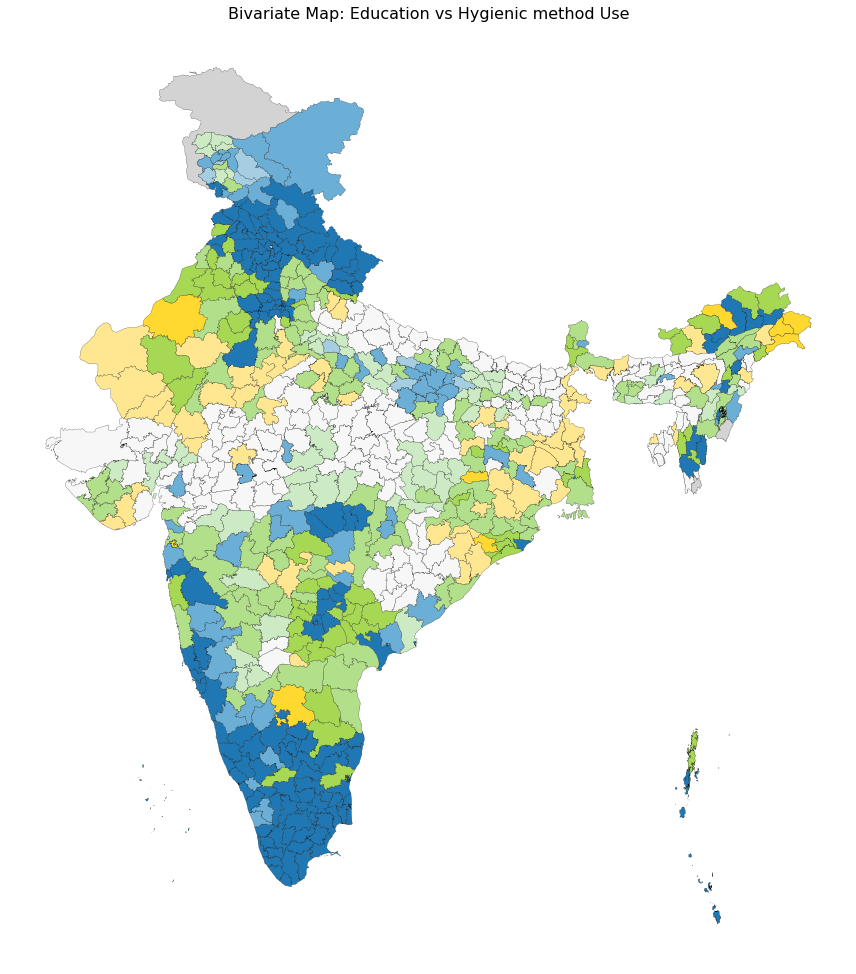

In [22]:


bivariate_cmap = {
    "1-3": "#ffd92f",
    "1-2": "#ffe791",
    "1-1": "#f7f7f7",
    "2-3": "#a6d854",
    "2-2": "#b2df8a",
    "2-1": "#ccebc5",
    "3-3": "#1f78b4",
    "3-2": "#6baed6",
    "3-1": "#a6cee3",
}


# Map colors
gdf['color'] = gdf['bivariate_class'].map(bivariate_cmap)

# Color missing/invalid data as grey
gdf['color'] = gdf['color'].fillna('lightgrey')
fig, ax = plt.subplots(1, 1, figsize=(12, 14))
gdf.plot(color=gdf['color'], linewidth=0.2, edgecolor='black', ax=ax)

# Title and styling
ax.set_title('Bivariate Map: Education vs Hygienic method Use', fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


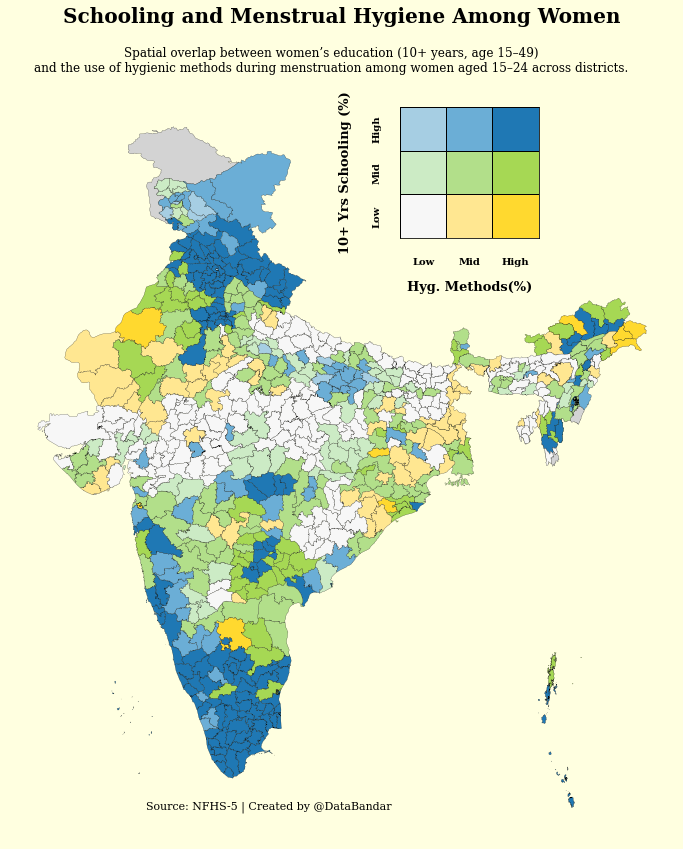

In [24]:

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patheffects as path_effects
from matplotlib.patches import FancyArrowPatch
import matplotlib.patheffects as path_effects
# Custom labels (you can customize these per variable)
label_map = {
    'Edu10': '10+ Yrs Schooling (%)',
    'Hygiene': 'Hyg. Methods(%)',
}

title = "Schooling and Menstrual Hygiene Among Women"

fig, ax = plt.subplots(1, 1, figsize=(12, 14), facecolor="lightyellow")

# Main map
gdf.plot(color=gdf['color'], linewidth=0.2, edgecolor='black', ax=ax)
ax.set_title(title, fontsize=20, fontweight='bold', family='serif', pad = 70)
ax.axis('off')

# Legend (upper-right corner)
legend_ax = fig.add_axes([0.58, 0.73, 0.16, 0.13])
legend_ax.set_xticks([])
legend_ax.set_yticks([])
legend_ax.set_frame_on(True)
legend_ax.set_facecolor("white")

# Plot 3x3 bivariate legend
for i, x in enumerate([0, 1, 2]):
    for j, y in enumerate([0, 1, 2]):
        key = f"{j+1}-{x+1}"  # y = col1 (vertical), x = col2 (horizontal)
        color = bivariate_cmap.get(key, 'lightgrey')
        legend_ax.add_patch(Rectangle((x, y), 1, 1, facecolor=color, edgecolor='black'))

# Add labels
for idx, label in enumerate(["Low", "Mid", "High"]):
    legend_ax.text(idx + 0.5, -0.6, label, ha='center', fontsize=10, fontweight='bold', family='serif')
    legend_ax.text(-0.6, idx + 0.5, label, va='center', fontsize=10, fontweight='bold', family='serif', rotation='vertical')

# Axis titles (based on label map)
legend_ax.text(1.5, -1.2, label_map.get(col2, col2), ha='center', fontsize=13, fontweight='bold', family='serif')
legend_ax.text(-1.2, 1.5, label_map.get(col1, col1), ha='center', va='center',
               fontsize=13, fontweight='bold', family='serif', rotation='vertical')

legend_ax.set_xlim(0, 3)
legend_ax.set_ylim(0, 3)

# Add source and note
subtitle = (
    "Spatial overlap between women’s education (10+ years, age 15–49)\n"
    "and the use of hygienic methods during menstruation among women aged 15–24 across districts."
)


fig.text(0.5, 0.92, subtitle,
         ha='center', va='top', fontsize=12, fontfamily='serif', color='black')


fig.text(0.57, 0.16,
         "Source: NFHS-5 | Created by @DataBandar",
         ha='right', va='bottom', fontsize=11, fontfamily='serif', color='black')

# Save and show
fig.savefig(f"{col1}_{col2}_bivariate_map.png", facecolor=fig.get_facecolor(), dpi=300, bbox_inches="tight")
plt.show()
